In [2]:
##################################
# loading data
import pandas as pd

data = pd.read_csv('E:/wochong/s40. MetaCell/sankey/strong.csv',sep='\t',header=0)
data['label'] = data.apply(lambda row : row['From'].split('_')[1],axis=1)
data['time'] = data.apply(lambda row : row['From'].split('_')[0],axis=1)
data.head()

,From,To,number,remain,label,time
0,0hpa1_Nb2,12hpa2_Nb2,69,True,Nb2,0hpa1
1,0hpa1_cathepsin,12hpa2_cathepsin,1744,True,cathepsin,0hpa1
2,0hpa1_cathepsin,12hpa2_gut,210,True,cathepsin,0hpa1
3,0hpa1_epidermal,12hpa2_epidermal,1589,True,epidermal,0hpa1
4,0hpa1_epidermal,12hpa2_muscle,97,True,epidermal,0hpa1


Text(0.5, 1.0, 'Sankey.')

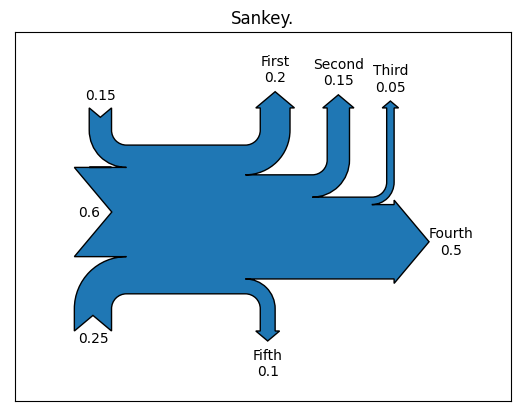

In [2]:
import matplotlib.pyplot as plt

from matplotlib.sankey import Sankey

Sankey(flows=[0.25, 0.15, 0.60, -0.20, -0.15, -0.05, -0.50, -0.10],
       labels=['', '', '', 'First', 'Second', 'Third', 'Fourth', 'Fifth'],
       orientations=[-1, 1, 0, 1, 1, 1, 0, -1]).finish()
plt.title("Sankey.")

In [3]:
data['label'].unique()


array(['Nb2', 'cathepsin', 'epidermal', 'gut', 'muscle', 'neural',
       'parenchymal', 'protonephridia', 'pharynx'], dtype=object)

In [4]:
############################
#  config x.y,color
import numpy as np
X_pos = {
    'WT'    : 0.01,
    '0hpa1' : 0.06,
    '12hpa2': 0.13,
    '36hpa2': 0.26,
    '3dpa2' : 0.39,
    '5dpa1' : 0.51,
    '7dpa2' : 0.64,
    '10dpa1': 0.77,
    '14dpa1': 0.9
}
Depths = {
    '0hpa1' : 0,
    '12hpa2': 1,
    '36hpa2': 2,
    '3dpa2' : 3,
    '5dpa1' : 4,
    '7dpa2' : 5,
    '10dpa1': 6,
    '14dpa1': 7
}
colors = [
'#1EA51D',
'#FBD26A',
'#002FA7',
'#BB86FC',
'#03DAC6',
'#CF6679',
'#A51DA5',
'#B0B0B0',
'#D62237',
'#333333',
]
Y_pos = {}
Cmap = {}
for i,x in enumerate(data['label'].unique()):
    Y_pos[x] =  float(i)/10.0
    Cmap[x] = colors[i]

In [5]:
Y_pos = {
 'cathepsin': 0.1,
 'gut': 0.2,
 'epidermal': 0.3,
 'muscle': 0.4,
 'neural': 0.5,
 'Nb2': 0.6,
 'parenchymal': 0.7,
 'protonephridia': 0.8,
 'pharynx': 0.9,
 'other':0.91,
}

In [6]:
Cmap = { 'other':'#000000',
         'neural': '#BB86FC',
         'cathepsin': '#03DAC6',
         'epidermal': '#002FA7',
         'gut': '#1EA51D',
         'muscle': '#CF6679',
         'Nb2': '#D62237',
         'parenchymal': '#FBD26A',
         'pharynx':'#B0B0B0' ,
         'protonephridia': '#A51DA5'}

In [7]:
import numpy as np
def get_nodes_links(data):
    node1 = data['From'].unique()
    node2 = data['To'].unique()
    nodes = np.union1d(node1,node2)
    node_id = {}
    i = 0;
    node = {
        "label":[],
        "x":[],
        "y":[],
        "color":[],
        
    };
    link = {
        "source": [],
        "target": [],
        "value": [],
        "color" :[],
    }
    #create nodes
    for x in nodes:
        time = x.split('_')[0]
        anno = x.split('_')[1]
        node_id[x] = i;
        i = i + 1 ;
        node['label'].append("")
        node['x'].append(X_pos[time])
        node['y'].append(Y_pos[anno])
        node['color'].append(Cmap[anno])
    #create links
    for _ , row in data.iterrows():
        anno = row['label']
        fromkey = row['From']
        tokey= row['To']
        link['source'].append(node_id[fromkey])
        link['target'].append(node_id[tokey])
        link['value'].append(row['number'])
        link['color'].append(Cmap[anno])
    return node,link


In [9]:
import plotly.graph_objects as go
import plotly.io as pio
#pio.kaleido.scope.default_format = "svg"

nodes , links = get_nodes_links(data)

fig = go.Figure(go.Sankey(node = nodes,arrangement='perpendicular',
    link = links ) )

fig.update_layout(
    title="Test",
    font=dict(size = 10, color = 'white'),
    plot_bgcolor='black',
    paper_bgcolor='black'
)
fig.update_layout(
    autosize=False,
    width=700,
    height=700,
)
fig.show()

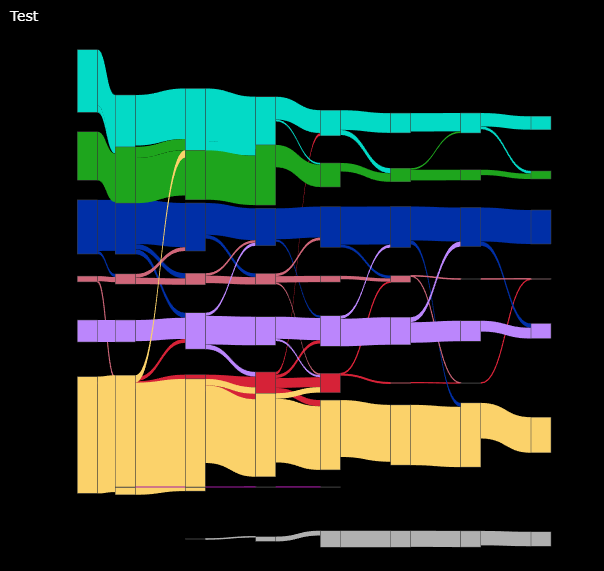

In [ ]:
import kaleido
fig.write_image("E:/wochong/fig1.pdf")

In [11]:
import plotly.graph_objects as go

nodes , links = get_nodes_links(data)

fig = go.Figure(go.Sankey(node = nodes,arrangement='perpendicular',
    link = links ) )

fig.update_layout(
    title="Test",
    font=dict(size = 10, color = 'white'),
    plot_bgcolor='black',
    paper_bgcolor='black'
)
fig.update_layout(
    autosize=False,
    width=1000,
    height=700,
)
fig.show()

the interactive image in above cell:
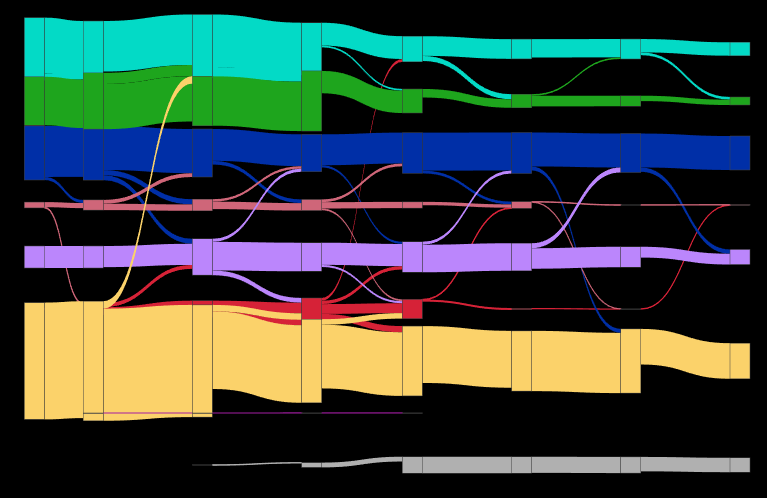

In [ ]:
fig.write_image("E:/wochong/fig1.pdf")
